In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Basic Exploratory Data Analysis

In [2]:
mush_df = pd.read_csv("mushrooms.csv")
mush_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
#Look directly at the value counts for each column

print(*(col.value_counts() for _, col in mush_df.iteritems()), sep="\n\n")

e    4208
p    3916
Name: class, dtype: int64

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

f    4748
t    3376
Name: bruises, dtype: int64

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

f    7914
a     210
Name: gill-attachment, dtype: int64

c    6812
w    1312
Name: gill-spacing, dtype: int64

b    5612
n    2512
Name: gill-size, dtype: int64

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

t    4608
e    3516
Name: stalk-shape, dtype: int64

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

s    5176
k    2372
f     552
y      24
Name

In [4]:
mush_df["stalk-root"].replace("?", pd.NA, inplace=True)
mush_df["stalk-root"].isnull().sum()

2480

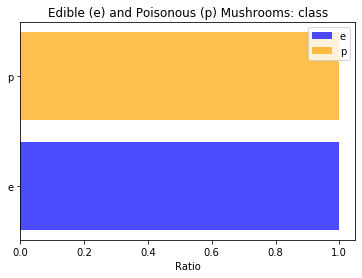

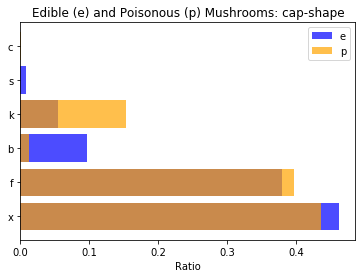

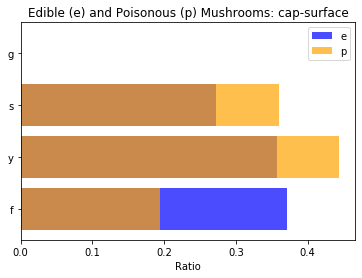

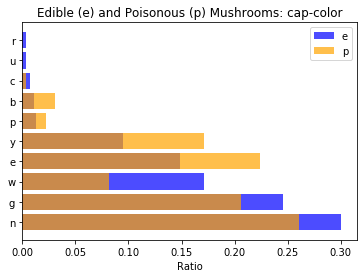

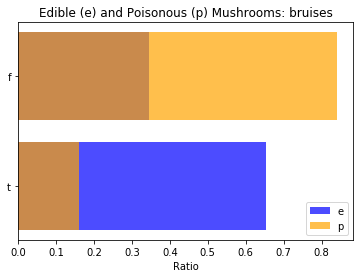

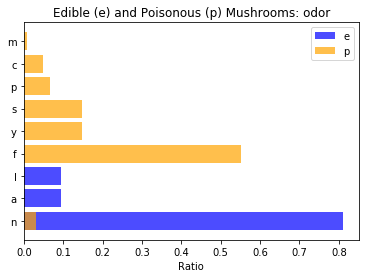

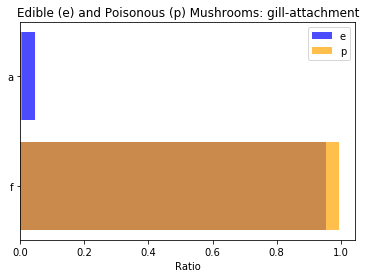

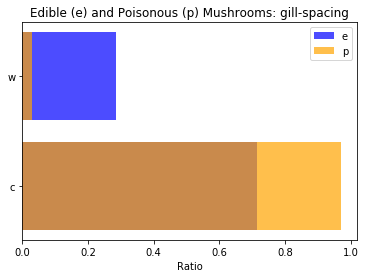

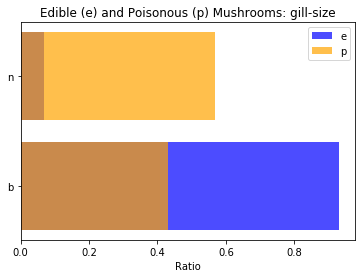

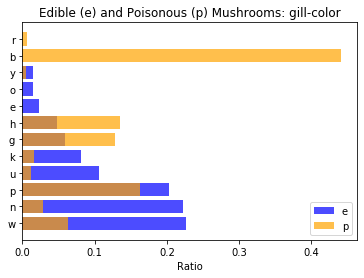

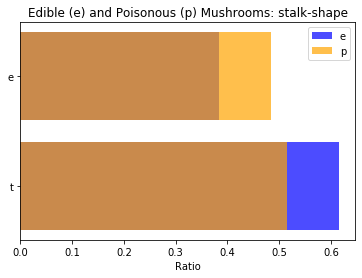

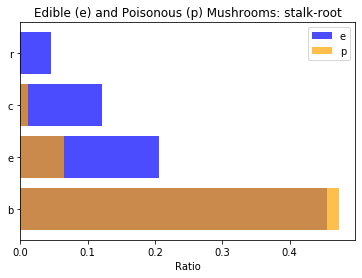

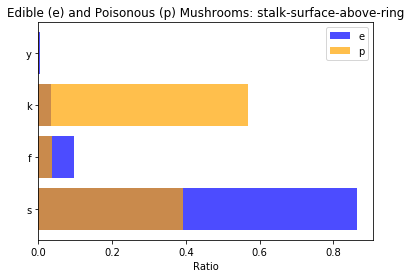

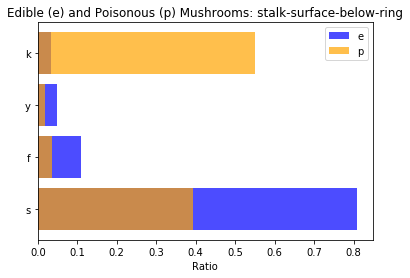

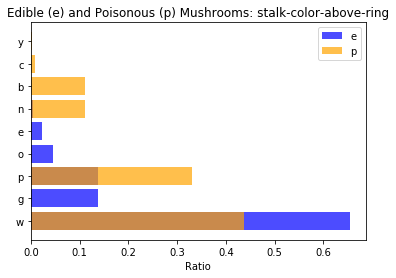

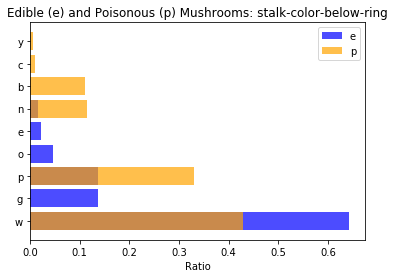

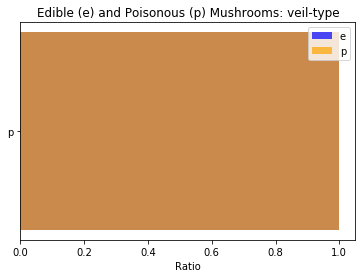

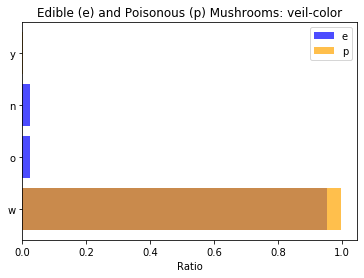

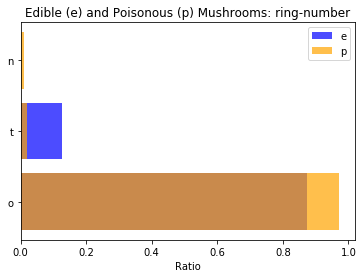

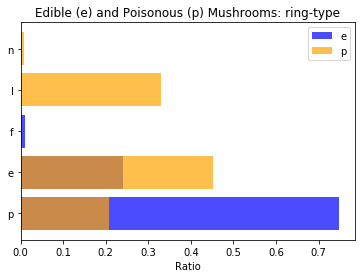

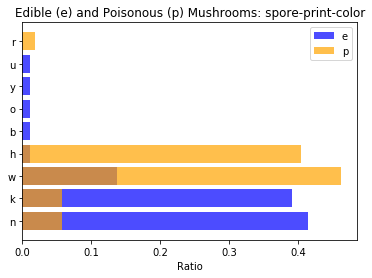

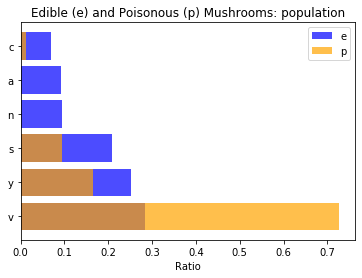

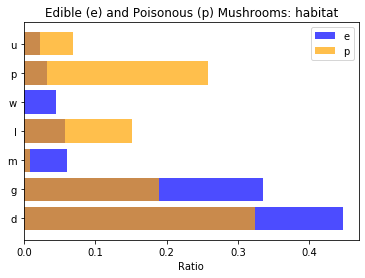

In [5]:
# visualize proportions of edible vs poisonous for each column

emush = mush_df[mush_df["class"] == "e"]
pmush = mush_df[mush_df["class"] == "p"]

for col in mush_df.columns:
    fig, ax = plt.subplots()
    valcounts = emush[col].value_counts()
    ax.set_title(f"Edible (e) and Poisonous (p) Mushrooms: {col}")
    ax.set_xlabel("Ratio")
    ax.barh(valcounts.index, valcounts.values/emush.shape[0], color="blue", alpha=0.7, label="e")
    valcounts = pmush[col].value_counts()
    ax.barh(valcounts.index, valcounts.values/pmush.shape[0], color="orange", alpha=0.7, label="p")
    ax.legend()
    plt.show()
    plt.close(fig)

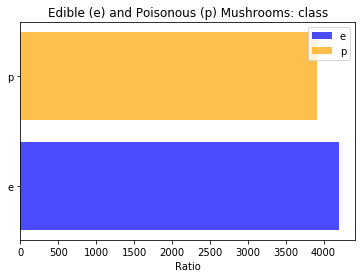

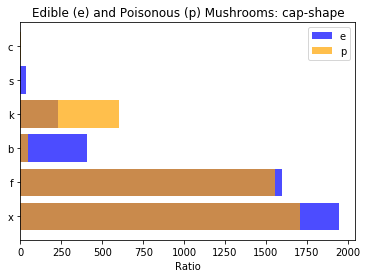

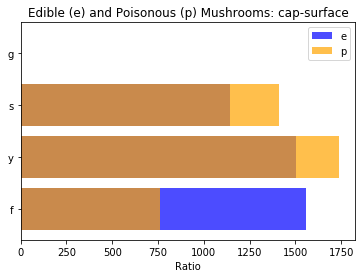

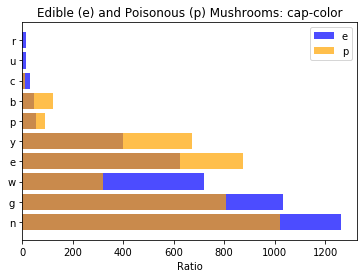

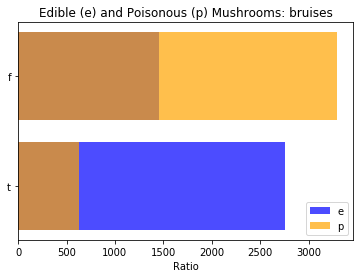

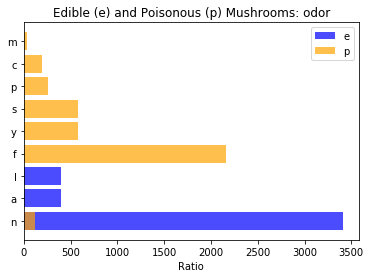

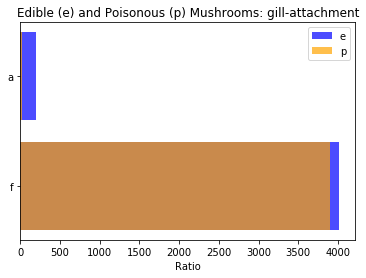

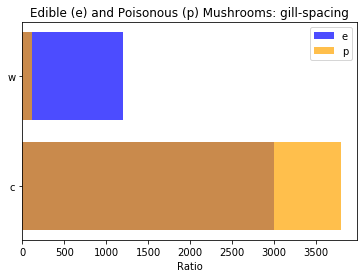

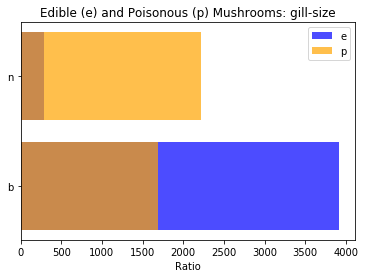

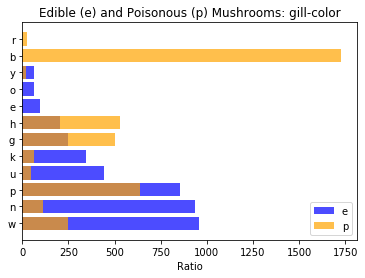

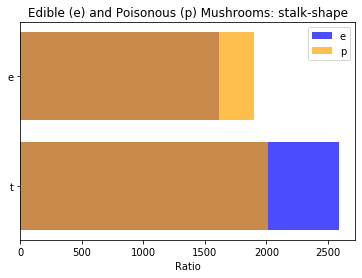

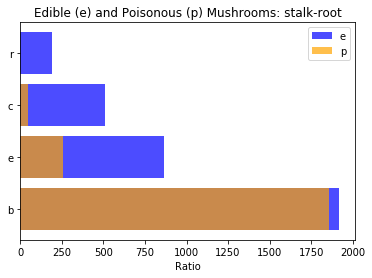

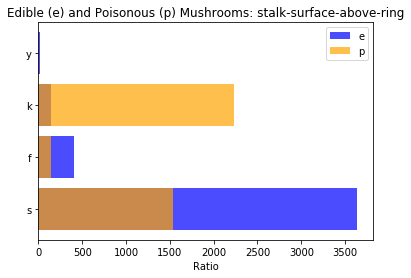

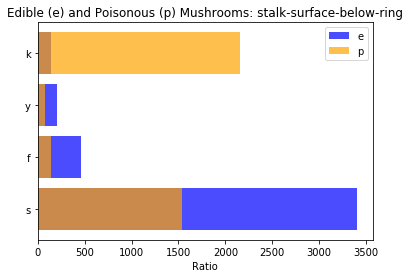

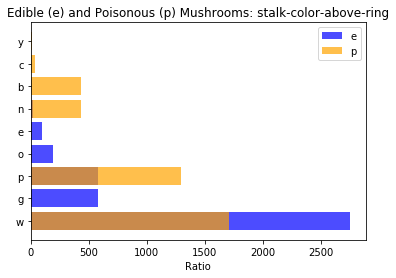

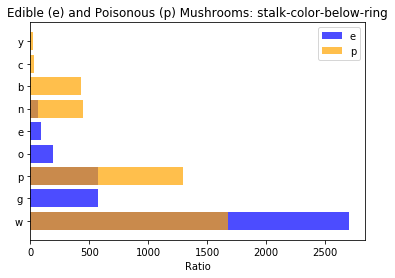

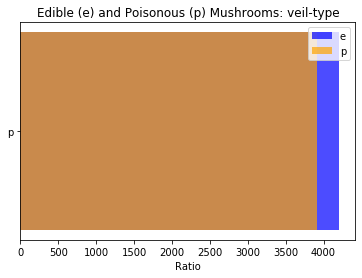

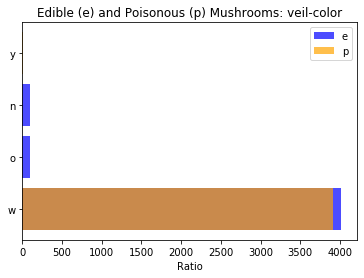

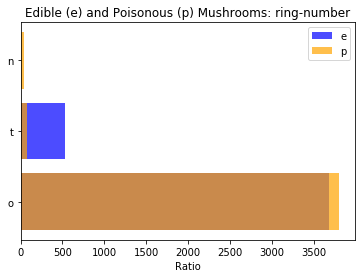

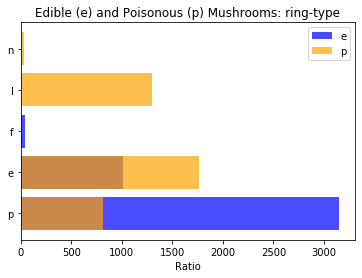

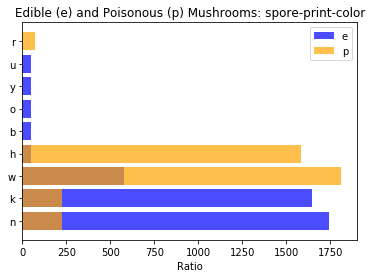

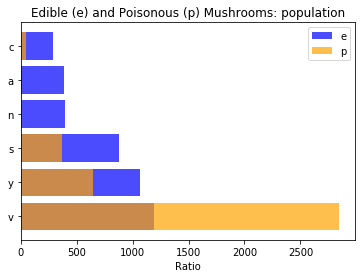

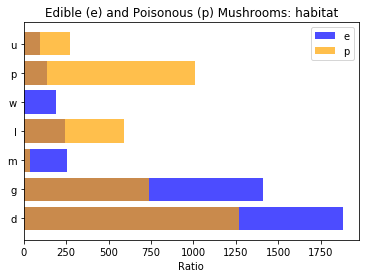

In [6]:
# visualize counts of edible vs poisonous by attribute values

emush = mush_df[mush_df["class"] == "e"]
pmush = mush_df[mush_df["class"] == "p"]

for col in mush_df.columns:
    fig, ax = plt.subplots()
    valcounts = emush[col].value_counts()
    ax.set_title(f"Edible (e) and Poisonous (p) Mushrooms: {col}")
    ax.set_xlabel("Ratio")
    ax.barh(valcounts.index, valcounts.values, color="blue", alpha=0.7, label="e")
    valcounts = pmush[col].value_counts()
    ax.barh(valcounts.index, valcounts.values, color="orange", alpha=0.7, label="p")
    ax.legend()
    plt.show()
    plt.close(fig)

In [7]:
mush_df.groupby("class").size() - mush_df.dropna().groupby("class").size()

class
e     720
p    1760
dtype: int64

In [8]:
mush_df = mush_df.drop("stalk-root", axis="columns")

Since "stalk-root" is the only attribute with missing values, this indicates that this attribute is disporportionaly missing for poisonous mushrooms.

In [9]:
grouped = mush_df.groupby("class")
summary = pd.DataFrame(columns=mush_df.columns, index=grouped.groups)
for row, group in grouped:
    for col in group.columns:
        counts = group[col].value_counts()
        summary.at[row, col] = {
            ind: val/len(group) for ind, val in counts.iteritems()
            if val/len(group) >= 0.5
        }

pd.options.display.max_columns = None        
summary

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
e,{'e': 1.0},{},{},{},{'t': 0.6539923954372624},{'n': 0.8098859315589354},{'f': 0.9543726235741445},{'c': 0.714828897338403},{'b': 0.9315589353612167},{},{'t': 0.6159695817490495},{'s': 0.8650190114068441},{'s': 0.8079847908745247},{'w': 0.6539923954372624},{'w': 0.6425855513307985},{'p': 1.0},{'w': 0.9543726235741445},{'o': 0.8745247148288974},{'p': 0.7490494296577946},{},{},{}
p,{'p': 1.0},{},{},{},{'f': 0.8406537282941777},{'f': 0.5515832482124617},{'f': 0.9954034729315628},{'c': 0.9713993871297242},{'n': 0.567926455566905},{},{'t': 0.5148110316649642},{'k': 0.5689479060265578},{'k': 0.5515832482124617},{},{},{'p': 1.0},{'w': 0.9979570990806946},{'o': 0.9724208375893769},{},{},{'v': 0.7272727272727273},{}


Given its unequal impact on edible and poisonous mushrooms in the database and the fact that it does not appear particularly useful, I am going to drop stalk-shape from the dataset.

In [10]:
mush_df["veil-type"].nunique()

1

In [11]:
# The veil-type attribute has only one value, so it is not helpful

mush_df.drop("veil-type", axis="columns", inplace=True)
summary.drop("veil-type", axis="columns", inplace=True)

In [12]:
for name, col in mush_df.iteritems():
    print(name, col.nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


In [13]:
summary

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
e,{'e': 1.0},{},{},{},{'t': 0.6539923954372624},{'n': 0.8098859315589354},{'f': 0.9543726235741445},{'c': 0.714828897338403},{'b': 0.9315589353612167},{},{'t': 0.6159695817490495},{'s': 0.8650190114068441},{'s': 0.8079847908745247},{'w': 0.6539923954372624},{'w': 0.6425855513307985},{'w': 0.9543726235741445},{'o': 0.8745247148288974},{'p': 0.7490494296577946},{},{},{}
p,{'p': 1.0},{},{},{},{'f': 0.8406537282941777},{'f': 0.5515832482124617},{'f': 0.9954034729315628},{'c': 0.9713993871297242},{'n': 0.567926455566905},{},{'t': 0.5148110316649642},{'k': 0.5689479060265578},{'k': 0.5515832482124617},{},{},{'w': 0.9979570990806946},{'o': 0.9724208375893769},{},{},{'v': 0.7272727272727273},{}


At first glance, it looks like **bruises**, **odor**, **gill-size**, **stalk-surface-above-ring**, and **stalk-surface-below-ring** might provide a decent contrast between edible and poisonous mushrooms because they each have only one label for over 50% of the instances in that group, and that label is different for edible vs. poisonous mushrooms.

In [14]:
# decode each column according to the information
# here: https://archive.ics.uci.edu/ml/datasets/Mushroom

decoder_dicts = {
    "cap-shape": dict(
        b="bell",
        c="conical",
        x="convex",
        f="flat",
        k="knobbed",
        s="sunken"
    ),
    "cap-surface": dict(
        f="fibrous",
        g="grooves",
        y="scaly",
        s="smooth"
    ),
    "cap-color": dict(
        n="brown",
        b="buff",
        c="cinnamon",
        g="gray",
        r="green",
        p="pink",
        u="purple",
        e="red",
        w="white",
        y="yellow"
    ),
    "bruises": dict(
        t="yes",
        f="no"
    ),
    "odor": dict(
        a="almond",
        l="anise",
        c="creosote",
        y="fishy",
        f="foul",
        m="musty",
        n="none",
        p="pungent",
        s="spicy"
    ),
    "gill-attachment": dict(
        a="attached",
        d="descending",
        f="free",
        n="notched"
    ),
    "gill-spacing": dict(
        c="close",
        w="crowded",
        d="distant"
    ),
    "gill-size": dict(
        b="broad",
        n="narrow"
    ),
    "gill-color": dict(
        k="black",
        n="brown",
        b="buff",
        h="chocolate",
        g="gray",
        r="green",
        o="orange",
        p="pink",
        u="purple",
        e="red",
        w="white",
        y="yellow"
    ),
    "stalk-shape": dict(
        e="enlarging",
        t="tapering"
    ),
    "stalk-surface-above-ring": dict(
        f="fibrous",
        y="scaly",
        k="silky",
        s="smooth"
    ),
    "stalk-surface-below-ring": dict(
        f="fibrous",
        y="scaly",
        k="silky",
        s="smooth"
    ),
    "stalk-color-above-ring": dict(
        n="brown",
        b="buff",
        c="cinnamon",
        g="gray",
        o="orange",
        p="pink",
        e="red",
        w="white",
        y="yellow"
    ),
    "stalk-color-below-ring": dict(
        n="brown",
        b="buff",
        c="cinnamon",
        g="gray",
        o="orange",
        p="pink",
        e="red",
        w="white",
        y="yellow"
    ),
    "veil-color": dict(
        n="brown",
        o="orange",
        w="white",
        y="yellow"
    ),
    "ring-number": dict(
        n="none",
        o="one",
        t="two"
    ),
    "ring-type": dict(
        c="cobwebby",
        e="evanescent",
        f="flaring",
        l="large",
        n="none",
        p="pendant",
        s="sheathing",
        z="zone"
    ),
    "spore-print-color": dict(
        k="black",
        n="brown",
        b="buff",
        h="chocolate",
        r="green",
        o="orange",
        u="purple",
        w="white",
        y="yellow"
    ),
    "population": dict(
        a="abundant",
        c="clustered",
        n="numerous",
        s="scattered",
        v="several",
        y="solitary"
    ),
    "habitat": dict(
        g="grasses",
        l="leaves",
        m="meadows",
        p="paths",
        u="urban",
        w="waste",
        d="woods"
    ),
    "class": dict(
        e="edible",
        p="poisonous"
    )
}

for name, col in mush_df.items():
    col.replace(decoder_dicts[name], inplace=True)

# print out unique for each col to make sure they have all decoded
print(*(col.unique() for _, col in mush_df.iteritems()), sep="\n\n")

['poisonous' 'edible']

['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']

['smooth' 'scaly' 'fibrous' 'grooves']

['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']

['yes' 'no']

['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']

['free' 'attached']

['close' 'crowded']

['narrow' 'broad']

['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']

['enlarging' 'tapering']

['smooth' 'fibrous' 'silky' 'scaly']

['smooth' 'fibrous' 'scaly' 'silky']

['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']

['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']

['white' 'brown' 'orange' 'yellow']

['one' 'two' 'none']

['pendant' 'evanescent' 'large' 'flaring' 'none']

['black' 'brown' 'purple' 'chocolate' 'white' 'green' 'orange' 'yellow'
 'buff']

['scattered' 'numerous' 'abundant' 'several' 'solitary' 'clustered']

['urban' 'grasses' 'meado

# Using Frequent Itemsets and Association Rules for Data Exploration

## Frequent Itemsets for Edible and Poisonous Mushrooms

In [15]:
# Ensure there are no missing values
mush_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

mushrooms = mush_df.copy()
for name, col in mushrooms.iteritems():
    mushrooms.loc[:, name] = col.map(lambda x: x + f"_{name}")

In [17]:
edible_selector = mushrooms["class"] == "edible_class"
edible = mushrooms[edible_selector].drop("class", axis="columns")
poisonous = mushrooms[~edible_selector].drop("class", axis="columns")

In [18]:
# frequent itemsets for edible mushrooms

dataset = edible.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
e_fisets = apriori(df, min_support=0.5, use_colnames=True)
e_fisets["length"] = e_fisets["itemsets"].map(len)

In [19]:
# frequent itemsets for poisonous mushrooms

dataset = poisonous.values.tolist()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
p_fisets = apriori(df, min_support=0.5, use_colnames=True)
p_fisets["length"] = p_fisets["itemsets"].map(len)

In [20]:
# print most frequent attribute values for edible mushrooms

e_fisets[e_fisets["length"] == 1]

,support,itemsets,length
0,0.931559,(broad_gill-size),1
1,0.714829,(close_gill-spacing),1
2,0.954373,(free_gill-attachment),1
3,0.809886,(none_odor),1
4,0.874525,(one_ring-number),1
5,0.749049,(pendant_ring-type),1
6,0.865019,(smooth_stalk-surface-above-ring),1
7,0.807985,(smooth_stalk-surface-below-ring),1
8,0.615970,(tapering_stalk-shape),1
9,0.653992,(white_stalk-color-above-ring),1


In [21]:
# print most frequent attribute values for poisonous mushrooms

p_fisets[p_fisets["length"] == 1]

,support,itemsets,length
0,0.971399,(close_gill-spacing),1
1,0.551583,(foul_odor),1
2,0.995403,(free_gill-attachment),1
3,0.567926,(narrow_gill-size),1
4,0.840654,(no_bruises),1
5,0.972421,(one_ring-number),1
6,0.727273,(several_population),1
7,0.568948,(silky_stalk-surface-above-ring),1
8,0.551583,(silky_stalk-surface-below-ring),1
9,0.514811,(tapering_stalk-shape),1


In [22]:
# What percentage of frequent itemsets in e_fisets are also in p_fisets?

e_fisets["itemsets"].map(lambda x: x in p_fisets["itemsets"].values).mean()

0.03194444444444444

In [23]:
# What percentage of frequent itemsets in p_fisets are also in e_fisets?

p_fisets["itemsets"].map(lambda x: x in e_fisets["itemsets"].values).mean()

0.12299465240641712

These initial results indicate that it will probably be harder to positively identify a poisonous mushroom than it is to positively identify an edible mushroom.

## Association Rules for Edible and Poisonous Mushrooms

In [24]:
from mlxtend.frequent_patterns import association_rules

In [25]:
dataset = mushrooms.values.tolist()

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
fisets = apriori(df, min_support=0.3, use_colnames=True)
fisets["length"] = fisets["itemsets"].map(len)

fisets

,support,itemsets,length
0,0.690793,(broad_gill-size),1
1,0.838503,(close_gill-spacing),1
2,0.450025,(convex_cap-shape),1
3,0.517971,(edible_class),1
4,0.432792,(enlarging_stalk-shape),1
...,...,...,...
1321,0.328902,"(smooth_stalk-surface-below-ring, white_veil-c...",7
1322,0.303299,"(close_gill-spacing, white_veil-color, yes_bru...",8
1323,0.303299,"(smooth_stalk-surface-below-ring, close_gill-s...",8
1324,0.317085,"(close_gill-spacing, white_veil-color, yes_bru...",8


In [26]:
# only find rules that are "more likely than not", i.e., with confidence > 0.5

rules = association_rules(fisets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(broad_gill-size),(close_gill-spacing),0.690793,0.838503,0.560807,0.811832,0.968192,-0.018424,0.858258
1,(close_gill-spacing),(broad_gill-size),0.838503,0.690793,0.560807,0.668820,0.968192,-0.018424,0.933652
2,(convex_cap-shape),(broad_gill-size),0.450025,0.690793,0.323978,0.719912,1.042154,0.013105,1.103967
3,(broad_gill-size),(edible_class),0.690793,0.517971,0.482521,0.698503,1.348536,0.124710,1.598785
4,(edible_class),(broad_gill-size),0.517971,0.690793,0.482521,0.931559,1.348536,0.124710,4.517862
...,...,...,...,...,...,...,...,...,...
25573,"(pendant_ring-type, one_ring-number)","(smooth_stalk-surface-below-ring, close_gill-s...",0.438208,0.352536,0.316100,0.721348,2.046171,0.161617,2.323561
25574,"(smooth_stalk-surface-above-ring, one_ring-num...","(smooth_stalk-surface-below-ring, close_gill-s...",0.582964,0.337765,0.316100,0.542230,1.605348,0.119196,1.446654
25575,(smooth_stalk-surface-below-ring),"(close_gill-spacing, white_veil-color, yes_bru...",0.607582,0.348597,0.316100,0.520259,1.492439,0.104299,1.357824
25576,(yes_bruises),"(smooth_stalk-surface-below-ring, close_gill-s...",0.415559,0.339734,0.316100,0.760664,2.238996,0.174921,2.758735


In [27]:
# Find subset of rules that have the "edible" or "poisonous" as their consequent

predictors = rules[
    ~ rules["antecedents"].map(lambda x: "edible_class" in x or "poisonous_class" in x)
    & rules["consequents"].map(lambda x: {"edible_class"} == x or {"poisonous_class"} == x)
]
predictors["ant_length"] = predictors["antecedents"].map(len)
predictors.reset_index(inplace=True, drop=True)
predictors

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length
0,(broad_gill-size),(edible_class),0.690793,0.517971,0.482521,0.698503,1.348536,0.124710,1.598785,1
1,(close_gill-spacing),(poisonous_class),0.838503,0.482029,0.468242,0.558426,1.158492,0.064060,1.173012,1
2,(free_gill-attachment),(edible_class),0.974151,0.517971,0.494338,0.507455,0.979697,-0.010244,0.978649,1
3,(none_odor),(edible_class),0.434269,0.517971,0.419498,0.965986,1.864941,0.194559,14.171640,1
4,(pendant_ring-type),(edible_class),0.488429,0.517971,0.387986,0.794355,1.533588,0.134994,2.343982,1
...,...,...,...,...,...,...,...,...,...,...
411,"(smooth_stalk-surface-below-ring, close_gill-s...",(edible_class),0.352536,0.517971,0.303299,0.860335,1.660970,0.120695,3.451324,6
412,"(several_population, close_gill-spacing, white...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,6
413,"(white_veil-color, yes_bruises, free_gill-atta...",(edible_class),0.361398,0.517971,0.311177,0.861035,1.662322,0.123983,3.468715,6
414,"(close_gill-spacing, white_veil-color, yes_bru...",(edible_class),0.329887,0.517971,0.303299,0.919403,1.775007,0.132427,5.980725,7


In [28]:
# Verify that no antecedent is present in both e_predictors and p_predictors
# By verifying that no antecedent is repeated in predictors["antecedents"]

len(predictors["antecedents"]) == predictors["antecedents"].nunique()

True

In [29]:
# split predictors into rules that predict "edible" and rules that predict "poisonous"

selector = predictors["consequents"] == {"edible_class"}
e_predictors = predictors[selector].reset_index(drop=True)
p_predictors = predictors[~selector].reset_index(drop=True)

In [30]:
# print the itemsets most associated with edible mushrooms

e_predictors.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length
300,"(white_veil-color, free_gill-attachment, none_...",(edible_class),0.307238,0.517971,0.307238,1.000000,1.930608,0.148097,inf,5
311,"(white_veil-color, none_odor, broad_gill-size,...",(edible_class),0.307238,0.517971,0.307238,1.000000,1.930608,0.148097,inf,5
245,"(tapering_stalk-shape, one_ring-number, free_g...",(edible_class),0.307238,0.517971,0.307238,1.000000,1.930608,0.148097,inf,4
185,"(broad_gill-size, tapering_stalk-shape, free_g...",(edible_class),0.307238,0.517971,0.307238,1.000000,1.930608,0.148097,inf,4
145,"(white_veil-color, tapering_stalk-shape, none_...",(edible_class),0.307238,0.517971,0.307238,1.000000,1.930608,0.148097,inf,3
...,...,...,...,...,...,...,...,...,...,...
135,"(white_veil-color, tapering_stalk-shape, free_...",(edible_class),0.567208,0.517971,0.319055,0.562500,1.085967,0.025257,1.101780,3
154,"(white_veil-color, tapering_stalk-shape, one_r...",(edible_class),0.567208,0.517971,0.319055,0.562500,1.085967,0.025257,1.101780,3
34,"(white_veil-color, free_gill-attachment)",(edible_class),0.973166,0.517971,0.494338,0.507969,0.980688,-0.009734,0.979670,2
1,(free_gill-attachment),(edible_class),0.974151,0.517971,0.494338,0.507455,0.979697,-0.010244,0.978649,1


In [31]:
# Find minimum antecedents that guarantee edibility of mushroom

definitely_e = e_predictors[e_predictors["confidence"] == 1]
ants = definitely_e["antecedents"].array
emin_itemsets = []
for ant in ants:
    if any(other < ant for other in ants):
        continue
    else:
        emin_itemsets.append(ant)
emin_itemsets

[frozenset({'none_odor', 'tapering_stalk-shape'}),
 frozenset({'broad_gill-size', 'none_odor', 'one_ring-number'})]

In [32]:
# print out all of the stats for the "guarantees"
definitely_e[definitely_e["antecedents"].map(lambda x: x in emin_itemsets)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length
39,"(tapering_stalk-shape, none_odor)",(edible_class),0.307238,0.517971,0.307238,1.0,1.930608,0.148097,inf,2
76,"(broad_gill-size, one_ring-number, none_odor)",(edible_class),0.330871,0.517971,0.330871,1.0,1.930608,0.159490,inf,3


We see here that these two sets of attributes are always associated with an edible mushroom in this dataset.  These are the "play it safe" rules that one might follow.  The positive thing about them is that they are highly associated with edibility and are easy to remember.  The caveat is that these rules only apply to about one in three mushrooms (see "antecedent support" in the table above).

In [33]:
p_predictors.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length
59,"(several_population, close_gill-spacing, white...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,6
46,"(white_veil-color, several_population, no_brui...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,4
57,"(several_population, close_gill-spacing, white...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,5
39,"(several_population, free_gill-attachment, no_...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,4
53,"(several_population, close_gill-spacing, no_br...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,5
55,"(several_population, close_gill-spacing, white...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,5
45,"(white_veil-color, close_gill-spacing, one_rin...",(poisonous_class),0.405711,0.482029,0.387986,0.956311,1.983930,0.192422,11.855791,4
54,"(close_gill-spacing, white_veil-color, no_brui...",(poisonous_class),0.405711,0.482029,0.387986,0.956311,1.983930,0.192422,11.855791,5
38,"(close_gill-spacing, free_gill-attachment, one...",(poisonous_class),0.405711,0.482029,0.387986,0.956311,1.983930,0.192422,11.855791,4
36,"(white_veil-color, no_bruises, several_populat...",(poisonous_class),0.322994,0.482029,0.308223,0.954268,1.979692,0.152530,11.326309,3


In [34]:
# Find minimum association rules that predict poisonous with confidence > 0.9
probably_p = p_predictors[p_predictors["confidence"] > 0.9]
ants = probably_p["antecedents"]
confs = probably_p["confidence"]
pmin_itemsets = []
for conf in sorted(confs.unique(), reverse=True):
    curr_ants = ants[confs == conf]
    for ant in curr_ants:
        if(
            any(other < ant for other in curr_ants)
            or any(other < ant for other in pmin_itemsets)
        ):
            continue
        else:
            pmin_itemsets.append(ant)
pmin_itemsets

[frozenset({'close_gill-spacing',
            'free_gill-attachment',
            'no_bruises',
            'several_population'}),
 frozenset({'close_gill-spacing',
            'no_bruises',
            'several_population',
            'white_veil-color'}),
 frozenset({'close_gill-spacing',
            'free_gill-attachment',
            'no_bruises',
            'one_ring-number'}),
 frozenset({'close_gill-spacing',
            'no_bruises',
            'one_ring-number',
            'white_veil-color'}),
 frozenset({'free_gill-attachment', 'no_bruises', 'several_population'}),
 frozenset({'no_bruises', 'several_population', 'white_veil-color'}),
 frozenset({'close_gill-spacing', 'no_bruises', 'white_veil-color'}),
 frozenset({'close_gill-spacing', 'free_gill-attachment', 'no_bruises'}),
 frozenset({'close_gill-spacing', 'no_bruises', 'several_population'}),
 frozenset({'no_bruises', 'several_population'}),
 frozenset({'close_gill-spacing', 'no_bruises', 'one_ring-number'}),
 frozen

In [35]:
# print itemsets associated with poisonous mushrooms
# by confidence in decending order (more accurate rule)
# then by antecedent length in ascending order (shorter antecedents are easier to remember)

(
    probably_p[probably_p["antecedents"]
    .map(lambda x: x in pmin_itemsets)]
    .sort_values(by=["confidence", "ant_length"], ascending=[False, True])
)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length
39,"(several_population, free_gill-attachment, no_...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,4
46,"(white_veil-color, several_population, no_brui...",(poisonous_class),0.311177,0.482029,0.302314,0.971519,2.015480,0.152318,18.186553,4
38,"(close_gill-spacing, free_gill-attachment, one...",(poisonous_class),0.405711,0.482029,0.387986,0.956311,1.983930,0.192422,11.855791,4
45,"(white_veil-color, close_gill-spacing, one_rin...",(poisonous_class),0.405711,0.482029,0.387986,0.956311,1.983930,0.192422,11.855791,4
29,"(no_bruises, several_population, free_gill-att...",(poisonous_class),0.322994,0.482029,0.308223,0.954268,1.979692,0.152530,11.326309,3
36,"(white_veil-color, no_bruises, several_populat...",(poisonous_class),0.322994,0.482029,0.308223,0.954268,1.979692,0.152530,11.326309,3
24,"(white_veil-color, close_gill-spacing, no_brui...",(poisonous_class),0.412112,0.482029,0.392418,0.952210,1.975423,0.193768,10.838552,3
18,"(no_bruises, free_gill-attachment, close_gill-...",(poisonous_class),0.409897,0.482029,0.390202,0.951952,1.974887,0.192620,10.780281,3
23,"(close_gill-spacing, several_population, no_br...",(poisonous_class),0.322994,0.482029,0.302314,0.935976,1.941743,0.146622,8.090221,3
13,"(no_bruises, several_population)",(poisonous_class),0.334810,0.482029,0.308223,0.920588,1.909821,0.146834,6.522603,2


In [36]:
# 

p_predictors[p_predictors["antecedents"].map(lambda x: x == frozenset(("no_bruises",)))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ant_length
1,(no_bruises),(poisonous_class),0.584441,0.482029,0.405219,0.693345,1.438389,0.123502,1.689099,1


There does seem to be some support here for the fact that sets of attributes are useful predictors of a mushroom being either edible or poisonous.  A Decision Tree classifier would be more useful for this because it also takes into account the absence of a certain attribute value when a decision node evaluates to False.

# Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
from decisiontree import DecisionTree

# move labels to the end, as the DecisionTree class expects
last_col = mush_df.pop("class")
mush_df.insert(mush_df.shape[1], "class", last_col)
mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,smooth,smooth,white,white,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses,edible


In [38]:
whole_set = mush_df.drop("class", axis="columns")
all_labels = mush_df["class"]
training_set, test = train_test_split(mush_df, random_state=31)
test_set = test.drop("class", axis="columns")
test_labels = test["class"]
training_set.shape, test_set.shape

((6093, 21), (2031, 20))

In [39]:
# descriptive tree to get rules of thumb.  Explanatory model, not for prediction.
# allow to overfit
descriptive_model = DecisionTree(min_leafsize=1, min_leafpurity=1).fit(mush_df, print_summary=True)

Decision: odor = none, Gain= 0.529
    If True, Decision: spore-print-color = green, Gain= 0.111
        If True, Leaf: label= poisonous, purity= 1.0, size= 72
        If False, Decision: stalk-surface-below-ring = scaly, Gain= 0.068
            If True, Decision: gill-size = narrow, Gain= 0.863
                If True, Leaf: label= poisonous, purity= 1.0, size= 40
                If False, Leaf: label= edible, purity= 1.0, size= 16
            If False, Decision: cap-surface = grooves, Gain= 0.011
                If True, Leaf: label= poisonous, purity= 1.0, size= 4
                If False, Decision: gill-size = broad, Gain= 0.005
                    If True, Leaf: label= edible, purity= 1.0, size= 3200
                    If False, Decision: bruises = no, Gain= 0.144
                        If True, Leaf: label= edible, purity= 1.0, size= 192
                        If False, Leaf: label= poisonous, purity= 1.0, size= 4
    If False, Decision: bruises = yes, Gain= 0.382
        If T

In [40]:
# Predictive decision tree
mush_tree = DecisionTree(min_leafsize=5, min_leafpurity=0.95).fit(training_set, print_summary=True)

Decision: odor = none, Gain= 0.537
    If True, Leaf: label= edible, purity= 0.966, size= 2644
    If False, Decision: bruises = no, Gain= 0.37
        If True, Leaf: label= poisonous, purity= 1.0, size= 2448
        If False, Decision: odor = foul, Gain= 0.356
            If True, Leaf: label= poisonous, purity= 1.0, size= 227
            If False, Decision: odor = pungent, Gain= 0.808
                If True, Leaf: label= poisonous, purity= 1.0, size= 192
                If False, Leaf: label= edible, purity= 1.0, size= 582


In [41]:
# in sample error rate
(mush_tree.predict(training_set.drop("class", axis="columns")) == training_set["class"]).mean()

0.9853930740193665

In [42]:
# out of sample error rate
y_pred = mush_tree.predict(test_set) 
(y_pred == test_labels).mean()

0.9847365829640571

In [43]:
def confusion_matrix(predicted_labels, actual_labels, possible_labels):
    pred_index = pd.MultiIndex.from_tuples([("Predicted", lab) for lab in possible_labels])
    act_index = pd.MultiIndex.from_tuples([("Actual", lab) for lab in possible_labels])
    confusion_matrix = pd.DataFrame(index=pred_index, columns=act_index)
    for pred in possible_labels:
        for act in possible_labels:
            confusion_matrix.at[("Predicted", pred), ("Actual", act)] = (
                ((predicted_labels == pred) & (actual_labels == act)).sum()
            )
    return confusion_matrix


def accuracy_metrics(conf_mat):
    overall_accuracy = (
        np.diagonal(conf_mat).sum()
        / conf_mat.values.sum()
    )
    edible_accuracy = (
        conf_mat.at[("Predicted", "edible"), ("Actual", "edible")]
        / conf_mat.loc[("Predicted", "edible")].sum()
    )
    poisonous_accuracy = (
        conf_mat.at[("Predicted", "poisonous"), ("Actual", "poisonous")]
        / conf_mat.loc[("Predicted", "poisonous")].sum()
    )
    return pd.Series({
        "Overall Accuracy": overall_accuracy,
        "Overall Failure": 1 - overall_accuracy,
        "Edible Accuracy": edible_accuracy,
        "Edible Failure": 1 - edible_accuracy,
        "Poisonous Accuracy": poisonous_accuracy,
        "Poisonous Failure": 1 - poisonous_accuracy
    })

In [44]:
conf_mat = confusion_matrix(y_pred, test_labels, ("edible", "poisonous"))
conf_mat

Actual          
                    edible poisonous
Predicted edible      1071        31
          poisonous      0       929

In [45]:
accuracy_metrics(conf_mat)

Overall Accuracy      0.984737
Overall Failure       0.015263
Edible Accuracy       0.971869
Edible Failure        0.028131
Poisonous Accuracy    1.000000
Poisonous Failure     0.000000
dtype: float64

In [46]:
# try it 10 times with different train/test splits to see if it's overfit
accuracies = np.zeros(10)
for i in range(10):
    temp_train, temp_test = train_test_split(mush_df, random_state=i)
    temp_test_obs = temp_test.drop("class", axis="columns")
    temp_test_labs = temp_test["class"]
    tree = DecisionTree(min_leafsize=5, min_leafpurity=0.95).fit(temp_train)
    preds = tree.predict(temp_test_obs)
    accuracies[i] = (preds == temp_test_labs).mean()

# print average out of sample accuracies across the trials
accuracies.mean()

0.9849335302806498

In [47]:
# print out 
accuracies

array([0.98670606, 0.98227474, 0.98621369, 0.98375185, 0.98572132,
       0.98670606, 0.98719842, 0.98621369, 0.98227474, 0.98227474])

# Random Forest

In [48]:
from decisiontree import RandomForest

In [49]:
# This cell takes a VERY long time to run
# Compute the out of bag (OOB) errors for different numbers of trees in forest
# The OOB Error curve will start to flatten out around the idea number of trees
# Always choose an odd number of trees to avoid ties in majority vote
# Allow each tree to perfectly fit its data, rely on bootstrapping to avoid overfitting

num_trees = (1, 5, 11, 15, 21, 31, 41, 51)
oob_errors = np.fromiter(
    (
        RandomForest(
            num_trees=num,
            min_leafsize=1,
            min_leafpurity=1,
            random_state=42
        )
        .fit(training_set)
        .oob_error_
        for num in num_trees
    ),
    dtype=np.float64,
    count=len(num_trees)
)

,Num_Trees,OOB_Error
0,1,0.617594
1,5,0.110455
2,11,0.005416
3,15,0.000985
4,21,0.000164
5,31,0.000000
6,41,0.000000
7,51,0.000000


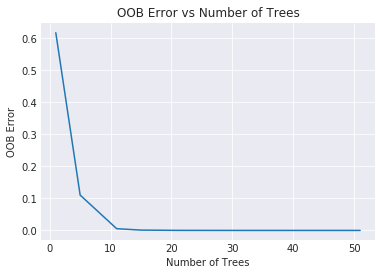

In [50]:
# Plot OOB Error vs number of trees, looking for leveling off point
with plt.style.context("seaborn-darkgrid"):
    plt.plot(num_trees, oob_errors)
    plt.title("OOB Error vs Number of Trees")
    plt.xlabel("Number of Trees")
    plt.ylabel("OOB Error")

# also print table of num_trees and oob_error
pd.DataFrame({"Num_Trees": num_trees, "OOB_Error": oob_errors})

In [51]:
# curve really significantly flattens out after 15 trees
# and then basically zeros out by 21 trees
# try 15 trees here

mush_forest = RandomForest(
    num_trees=15,
    min_leafsize=1,
    min_leafpurity=1,
    random_state=42
)
mush_forest = mush_forest.fit(training_set)
predictions = mush_forest.predict(test_set)
conf_mat = confusion_matrix(predictions, test_labels, ("edible", "poisonous"))
conf_mat

Actual          
                    edible poisonous
Predicted edible      1071         0
          poisonous      0       960

In [52]:
accuracy_metrics(conf_mat)

Overall Accuracy      1.0
Overall Failure       0.0
Edible Accuracy       1.0
Edible Failure        0.0
Poisonous Accuracy    1.0
Poisonous Failure     0.0
dtype: float64